# 数据清洗

In [450]:
# 导入包+读入数据
from matplotlib import pyplot as plt
import statsmodels.tsa.api as tsa
import statsmodels.api as sm

import pandas as pd
import numpy as np
import stats
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


data = pd.read_excel('./000001_12.24.xlsx')  # 读取excel文件

<function matplotlib.pyplot.show(close=None, block=None)>

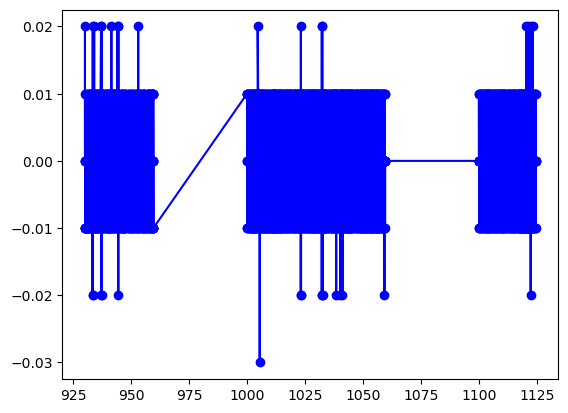

In [451]:
# 数据预处理
time = data.iloc[1:2300, 0]
price = data.iloc[:2300, 1]

# 将价格数据转换为NumPy数组
time /= 100000
price /= 10000

price = np.array(price)
price_diff = np.diff(price)

plt.plot(time, price_diff, marker='o', linestyle='-', color='b', label='折线图')
plt.show

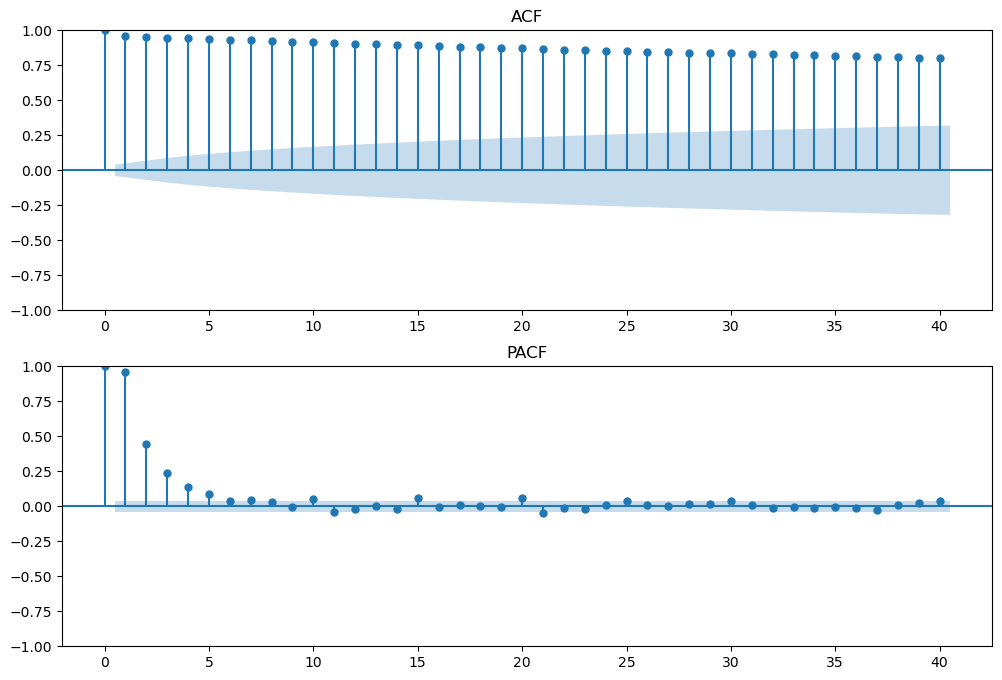

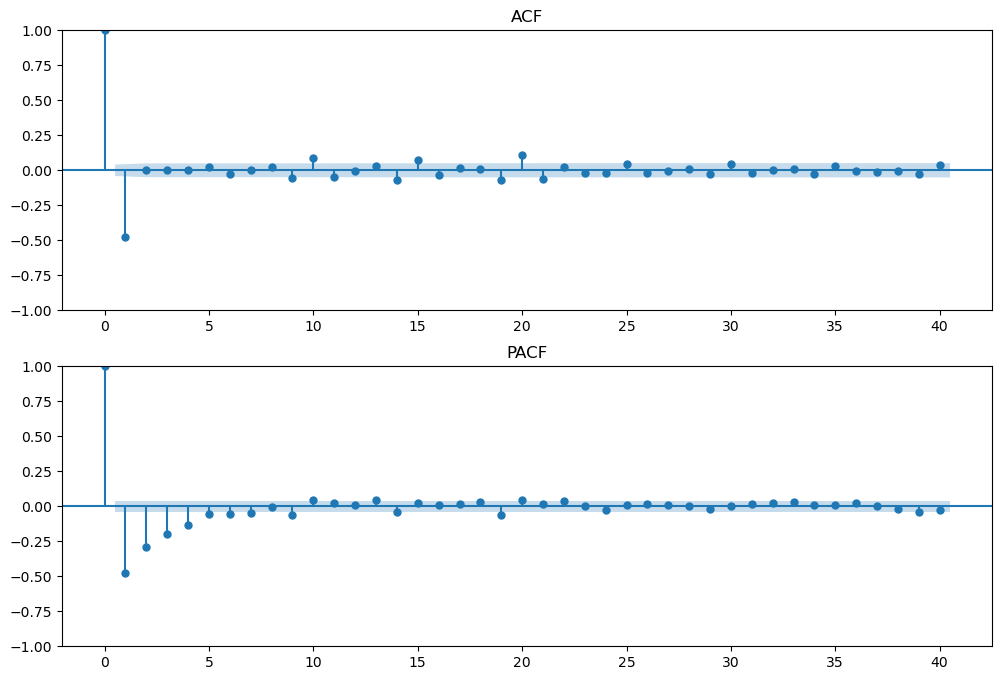

In [452]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
# 绘制ACF图
plot_acf(price, ax=ax1, lags=40)
ax1.set_title('ACF')
# 绘制PACF图
plot_pacf(price, ax=ax2, lags=40)
ax2.set_title('PACF')
plt.show()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
# 绘制ACF图
plot_acf(price_diff, ax=ax1, lags=40)
ax1.set_title('ACF')
# 绘制PACF图
plot_pacf(price_diff, ax=ax2, lags=40)
ax2.set_title('PACF')
plt.show()

In [453]:
# 计算ACF和PACF
acf = sm.tsa.acf(price_diff, fft=False)
pacf = sm.tsa.pacf(price_diff)

# 初始化 EACF 图数据
n = 10
eacf_matrix = [['o' for _ in range(n)] for _ in range(n)]

# 计算 EACF
for i in range(n):
    for j in range(i+1, n):
        eacf_val = acf[i] - pacf[j]
        if eacf_val < 0:
            eacf_matrix[i][j] = 'x'

# 打印 EACF 图
print("AR/MA")
for row in eacf_matrix:
    print(' '.join(row))

AR/MA
o o o o o o o o o o
o o x x x x x x x x
o o o o o o o o o o
o o o o o o o o o o
o o o o o o o o o o
o o o o o o o o o o
o o o o o o o o x o
o o o o o o o o o o
o o o o o o o o o o
o o o o o o o o o o


c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from current font.
  fig.canvas.print_figure(bytes_

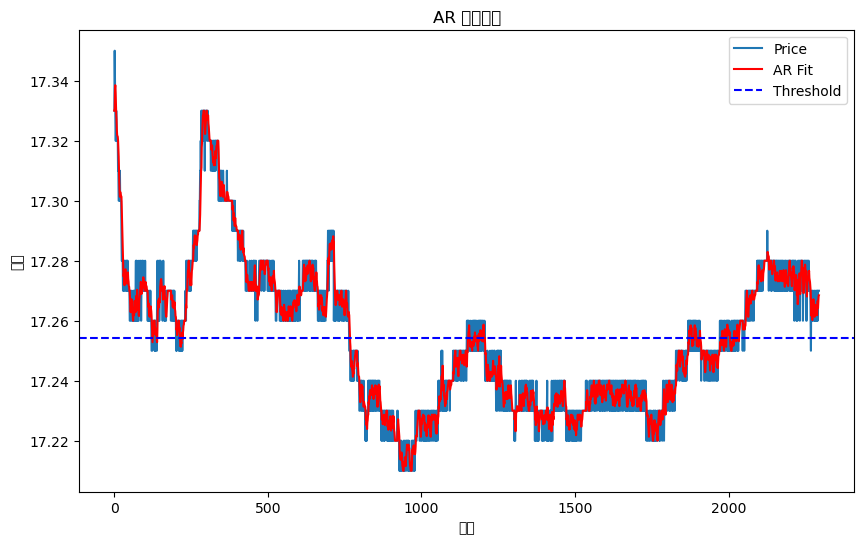

均方误差 (MSE): 3.3155707272357235e-05
决定系数 (R²): 0.9442478158478964
[17.269, 17.27, 17.27, 17.27, 17.269]
[17.26 17.26 17.26 17.26 17.27]


In [454]:
from sklearn.metrics import mean_squared_error

def AR_predict(data, steps_ahead, lag):
    data = pd.DataFrame({'Price': data})
    results = sm.tsa.ARIMA(data, order=(lag, 1, 0)).fit()
    # 创建一个时间序列数据框
    results.fittedvalues = results.fittedvalues[1:]
    data = data[1:]

    # 绘制原始数据和ARIMA拟合结果
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Price'], label='Price')
    plt.plot(data.index, results.fittedvalues, color='red', label='AR Fit')
    plt.axhline(threshold, color='blue', linestyle='--', label='Threshold')
    plt.legend()
    plt.xlabel('时间')
    plt.ylabel('价格')
    plt.title('AR 拟合效果')
    plt.show()

    # 计算均方误差
    mse = mean_squared_error(data['Price'], results.fittedvalues)
    print(f"均方误差 (MSE): {mse}")
    from sklearn.metrics import r2_score

    # 计算决定系数
    r2 = r2_score(data['Price'], results.fittedvalues)
    print(f"决定系数 (R²): {r2}")

    # Perform multi-step ahead forecasting
    forecast = results.forecast(steps=steps_ahead)
    print(list(np.round(forecast, 3)))


# 预测最后五个数据
AR_predict(price[:-6], 5, 4)

# 元数据的最后五个数据
print(price[-5:])

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2294
Model:                 ARIMA(0, 1, 1)   Log Likelihood                8576.844
Date:                Thu, 12 Oct 2023   AIC                         -17149.689
Time:                        18:23:57   BIC                         -17138.214
Sample:                             0   HQIC                        -17145.505
                               - 2294                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6793      0.014    -50.167      0.000      -0.706      -0.653
sigma2        3.3e-05   1.02e-06     32.317      0.000     3.1e-05     3.5e-05
Ljung-Box (L1) (Q):                   3.15   Jarque-

c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from current font.
  fig.canvas.print_figure(bytes_

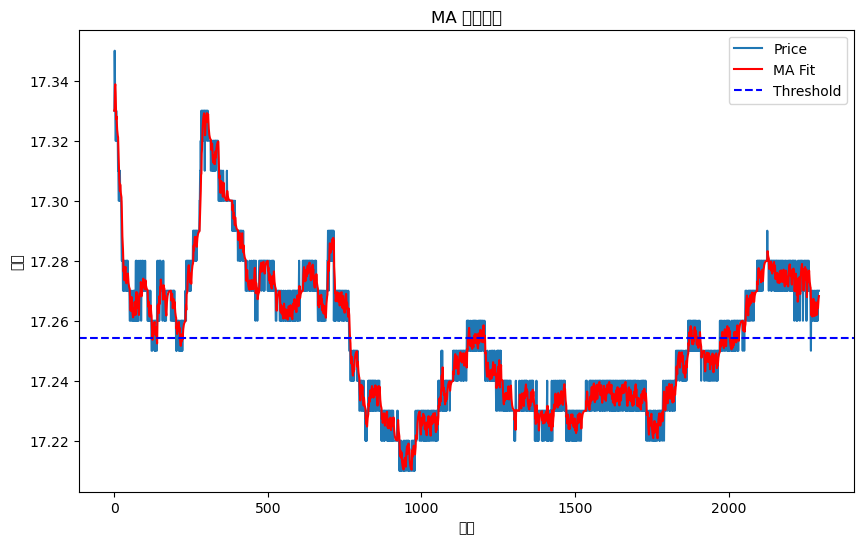

均方误差 (MSE): 3.302342249319385e-05
决定系数 (R²): 0.9444702561447615
[17.269, 17.269, 17.269, 17.269]
[17.26 17.26 17.26 17.26 17.27]


In [464]:
def MA_predict(data, steps_ahead, lag):
    data = pd.DataFrame({'Price': data})
    results = sm.tsa.ARIMA(data, order=(0, 1, lag)).fit()
    # 创建一个时间序列数据框
    results.fittedvalues = results.fittedvalues[1:]
    print(results.summary())
    data = data[1:]

    # 绘制原始数据和ARIMA拟合结果
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Price'], label='Price')
    plt.plot(data.index, results.fittedvalues, color='red', label='MA Fit')
    plt.axhline(threshold, color='blue', linestyle='--', label='Threshold')
    plt.legend()
    plt.xlabel('时间')
    plt.ylabel('价格')
    plt.title('MA 拟合效果')
    plt.show()

    # 计算均方误差
    mse = mean_squared_error(data['Price'], results.fittedvalues)
    print(f"均方误差 (MSE): {mse}")
    from sklearn.metrics import r2_score

    # 计算决定系数
    r2 = r2_score(data['Price'], results.fittedvalues)
    print(f"决定系数 (R²): {r2}")

    # Perform multi-step ahead forecasting
    forecast = results.forecast(steps=steps_ahead)
    print(list(np.round(forecast, 3)))


# 预测最后五个数据
MA_predict(price[:-6], 4, 1)

# 元数据的最后五个数据
print(price[-5:])

In [456]:
# Fit an ARIMA model
for i in range(2, 5):
    ARIMA = sm.tsa.ARIMA(price, order=(i, 1, 1)).fit()
    print(ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2300
Model:                 ARIMA(2, 1, 1)   Log Likelihood                8598.961
Date:                Thu, 12 Oct 2023   AIC                         -17189.921
Time:                        18:23:27   BIC                         -17166.960
Sample:                             0   HQIC                        -17181.550
                               - 2300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0093      0.037     -0.249      0.803      -0.082       0.064
ar.L2      -8.491e-05      0.030     -0.003      0.998      -0.060       0.059
ma.L1         -0.6688      0.032    -21.089      0.0

c:\Users\Jacky\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2300
Model:                 ARIMA(3, 1, 1)   Log Likelihood                8593.833
Date:                Thu, 12 Oct 2023   AIC                         -17177.666
Time:                        18:23:27   BIC                         -17148.965
Sample:                             0   HQIC                        -17167.202
                               - 2300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2763      0.085     -3.261      0.001      -0.442      -0.110
ar.L2         -0.1656      0.058     -2.870      0.004      -0.279      -0.053
ar.L3         -0.0782      0.037     -2.121      0.0

c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from current font.
  fig.canvas.print_figure(bytes_

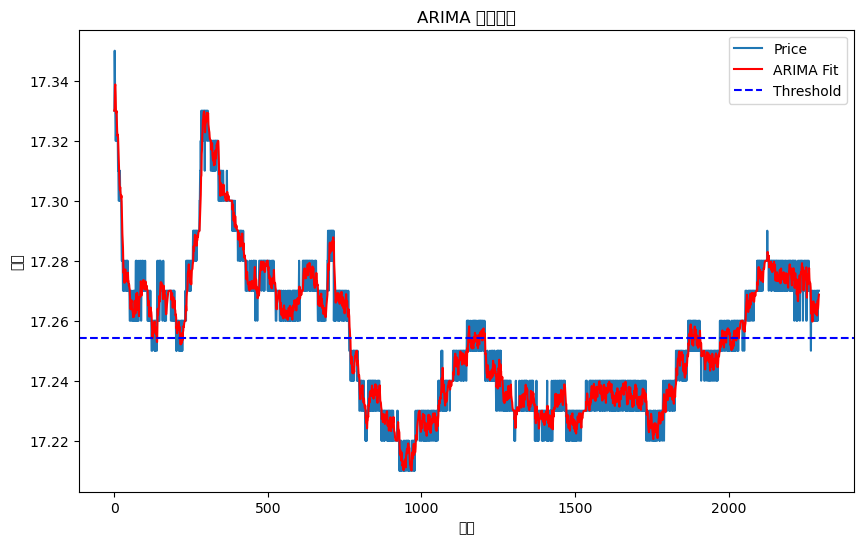

均方误差 (MSE): 3.319929043526718e-05
决定系数 (R²): 0.9441745296258736
[17.268, 17.269, 17.269, 17.269, 17.269]
[17.26 17.26 17.26 17.26 17.27]


In [457]:
def ARIMA_predict(data, steps_ahead):
    data = pd.DataFrame({'Price': data})
    results = sm.tsa.ARIMA(data, order=(4, 1, 1)).fit()
    # 创建一个时间序列数据框
    results.fittedvalues = results.fittedvalues[1:]
    data = data[1:]

    # 绘制原始数据和ARIMA拟合结果
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Price'], label='Price')
    plt.plot(data.index, results.fittedvalues, color='red', label='ARIMA Fit')
    plt.axhline(threshold, color='blue', linestyle='--', label='Threshold')
    plt.legend()
    plt.xlabel('时间')
    plt.ylabel('价格')
    plt.title('ARIMA 拟合效果')
    plt.show()

    # 计算均方误差
    mse = mean_squared_error(data['Price'], results.fittedvalues)
    print(f"均方误差 (MSE): {mse}")
    from sklearn.metrics import r2_score

    # 计算决定系数
    r2 = r2_score(data['Price'], results.fittedvalues)
    print(f"决定系数 (R²): {r2}")

    # Perform multi-step ahead forecasting
    forecast = results.forecast(steps=steps_ahead)
    print(list(np.round(forecast, 3)))


# 预测最后五个数据
ARIMA_predict(price[:-6], 5)

# 元数据的最后五个数据
print(price[-5:])

### ARCH模型

Iteration:      1,   Func. Count:      9,   Neg. LLF: 10202575530.215439
Iteration:      2,   Func. Count:     25,   Neg. LLF: 35151955.90201645
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8150.597124833552
            Iterations: 2
            Function evaluations: 35
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8150.60
Distribution:                  Normal   AIC:                          -16287.2
Method:            Maximum Likelihood   BIC:                          -16247.0
                                        No. Observations:                 2299
Date:                Thu, Oct 12 2023   Df Residuals:                     2298
Time:          

c:\Users\Jacky\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.985e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Jacky\anaconda3\lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\Jacky\anaconda3\lib\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer k

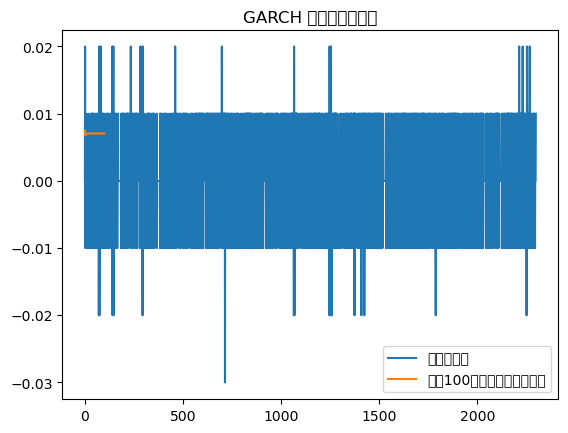

In [458]:
from arch import arch_model

# 创建一个p=1, q=1的GARCH(1,4)模型
model = arch_model(price_diff, vol='Garch', p=1, q=4)
results = model.fit()

# 打印模型的统计摘要
print(results.summary())

# 预测未来的波动性
forecast_horizon = 100
forecast = results.forecast(horizon=forecast_horizon)

# 打印预测结果
print(f"未来{forecast_horizon}个时期的波动性预测：\n", forecast.variance.values[-1, :])

# 绘制波动性预测图
plt.plot(price_diff, label="实际波动性")
plt.plot(np.sqrt(forecast.variance.values[-1, :]),
         label=f"未来{forecast_horizon}个时期的波动性预测")
plt.legend()
plt.title("GARCH 模型波动性预测")
plt.show()

In [459]:
import arch

# 创建ARCH模型
arch_model = arch.arch_model(price_diff, vol='ARCH', p=1)
results = arch_model.fit()

# 打印ARCH模型的结果
print(results.summary())

# 创建EGARCH模型
egarch_model = arch.arch_model(price_diff, vol='EGARCH', p=1, q=1)
egarch_results = egarch_model.fit()

# 打印EGARCH模型的结果
print(egarch_results.summary())

# 创建TARCH模型
tarch_model = arch.arch_model(price_diff, vol='Garch', p=1, q=1, power=1.0)
tarch_results = tarch_model.fit()

# 打印TARCH模型的结果
print(tarch_results.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 598385698.1278775
Iteration:      2,   Func. Count:     16,   Neg. LLF: -8145.036777535346
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8145.036777468071
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                8145.04
Distribution:                  Normal   AIC:                          -16284.1
Method:            Maximum Likelihood   BIC:                          -16266.9
                                        No. Observations:                 2299
Date:                Thu, Oct 12 2023   Df Residuals:                     2298
Time:          

c:\Users\Jacky\anaconda3\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.985e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Jacky\anaconda3\lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\Jacky\anaconda3\lib\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer k

In [460]:
# 读取各项指标
data = pd.read_csv('./market.csv',
                   encoding='gbk')  # 读取csv文件
# 数据分割


def data_cut(data):
    time = data.iloc[:, [3]].values  # 时间
    # 1.盘前数据
    i = j = k = 90000000
    for i in range(len(time)):
        if time[i] > 92500000:
            pre_data = data.iloc[0:i, :]
            pre_time = time[0:i]
            break

    # 2.早盘盘中数据
    for j in range(i, len(time)):
        if time[j] > 120000000:
            mor_data = data.iloc[i:j, :]
            mor_time = time[i:j]
            break

    # 3.午盘盘中数据
    for k in range(j, len(time)):
        if time[k] > 145700000:
            noon_data = data.iloc[j:k, :]
            noon_time = time[j:k]
            break

    # 4.尾盘数据
    post_data = data.iloc[k:, :]
    post_time = time[k:]
    print("盘前数据：", pre_data.shape)
    print("早盘盘中数据：", mor_data.shape)
    print("午盘盘中数据：", noon_data.shape)
    print("尾盘数据：", post_data.shape)
    print("总数据：", data.shape)

    return time, pre_data, mor_data, noon_data, post_data, pre_time, mor_time, noon_time, post_time


time, pre_data, mor_data, noon_data, post_data, pre_time, mor_time, noon_time, post_time = data_cut(
    data)

盘前数据： (62, 67)
早盘盘中数据： (2406, 67)
午盘盘中数据： (2341, 67)
尾盘数据： (21, 67)
总数据： (4830, 67)


# TAR模型

c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from current font.
  fig.canvas.print_figure(bytes_

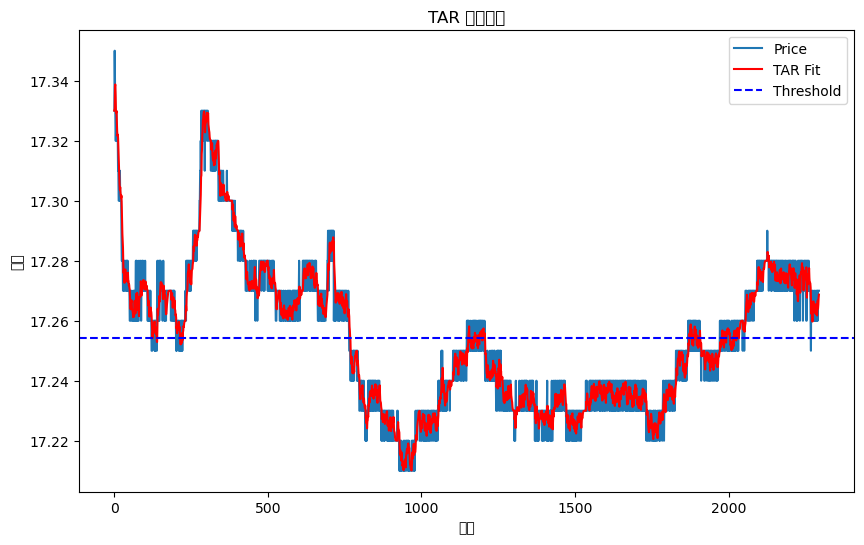

均方误差 (MSE): 3.319929043526718e-05
决定系数 (R²): 0.9441745296258736
[17.268, 17.269, 17.269, 17.269, 17.269]
[17.26 17.26 17.26 17.26 17.27]


In [461]:
# 创建一个时间序列数据框
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
data = pd.DataFrame({'Price': price[:-6]})

# 定义门限值
threshold = np.mean(price)  # 你可以根据你的数据和需求来设置门限值

# 划分状态
state = np.where(data['Price'] > threshold, 1, 0)

# 创建一个包含状态信息的数据框
data['State'] = state

# 拟合ARIMA模型，此处只是一个示例
model = sm.tsa.ARIMA(data['Price'], order=(4, 1, 1))  # 示例参数，你需要根据实际情况调整

results = model.fit()
results.fittedvalues = results.fittedvalues[1:]
data = data[1:]

# 绘制原始数据和ARIMA拟合结果
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'], label='Price')
plt.plot(data.index, results.fittedvalues, color='red', label='TAR Fit')
plt.axhline(threshold, color='blue', linestyle='--', label='Threshold')
plt.legend()
plt.xlabel('时间')
plt.ylabel('价格')
plt.title('TAR 拟合效果')
plt.show()


# 计算均方误差
mse = mean_squared_error(data['Price'], results.fittedvalues)
print(f"均方误差 (MSE): {mse}")

# 计算决定系数
r2 = r2_score(data['Price'], results.fittedvalues)
print(f"决定系数 (R²): {r2}")

# Perform multi-step ahead forecasting
forecast = results.forecast(steps=5)
print(list(np.round(forecast, 3)))

# 元数据的最后五个数据
print(price[-5:])

# 使用biliner model

In [462]:
# 读取各项指标

def get_basic_data(data):

    tran_price = data.iloc[:, [4]].values  # 成交价

    tran_amount = data.iloc[:, [5]].values  # 成交量

    vol_of_tran = data.iloc[:, [6]].values  # 成交额

    num_of_tran = data.iloc[:, [7]].values  # 成交笔数

    cum_day_amount = data.iloc[:, [11]].values  # 当日累计成交量

    cum_day_vol = data.iloc[:, [12]].values  # 当日累计成交额

    ceiling_price = data.iloc[:, [13]].values  # 最高限价

    floor_price = data.iloc[:, [14]].values  # 最低限价

    wei_aveg_bidp = data.iloc[:, [57]].values  # 加权平均叫卖价

    wei_aveg_askp = data.iloc[:, [58]].values  # 加权平均叫买价

    tot_bidp = data.iloc[:, [59]].values  # 叫卖总量

    tot_askp = data.iloc[:, [60]].values  # 叫买总量

    return tran_price, tran_amount, vol_of_tran, num_of_tran, cum_day_amount, cum_day_vol, ceiling_price, floor_price, open_price, wei_aveg_bidp, wei_aveg_askp, tot_bidp, tot_askp


mor_tran_price, mor_tran_amount, mor_vol_of_tran, mor_num_of_tran, mor_cum_day_amount, mor_cum_day_vol, mor_ceiling_price, mor_floor_price, mor_open_price, mor_wei_aveg_bidp, mor_wei_aveg_askp, mor_tot_bidp, mor_tot_askp = get_basic_data(
    mor_data)

mor_tran_price = mor_tran_price.ravel()
mor_tran_amount = mor_tran_amount.ravel()
mor_vol_of_tran = mor_vol_of_tran.ravel()
mor_num_of_tran = mor_num_of_tran.ravel()
mor_cum_day_amount = mor_cum_day_amount.ravel()
mor_cum_day_vol = mor_cum_day_vol.ravel()

X = [mor_tran_amount, mor_vol_of_tran, mor_num_of_tran,
     mor_cum_day_amount, mor_cum_day_vol]
X = np.array(X).T
y = np.array(mor_tran_price)
X = X / 10000
y = y / 10000

(1924, 5) (482, 5) (1924,) (482,)


c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39033 (\N{CJK UNIFIED IDEOGRAPH-9879}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jacky\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from current font.
  fig.canvas.print_figure(bytes_

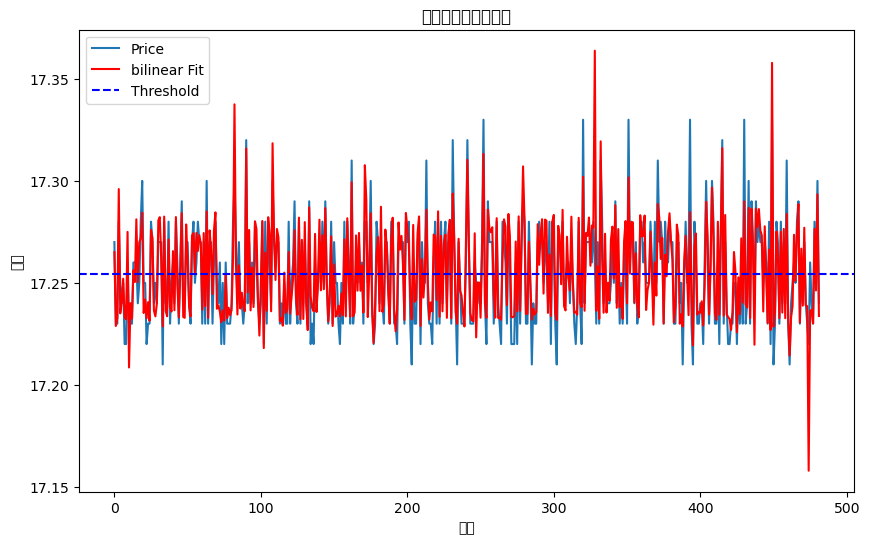

均方误差 (MSE): 0.00014207597154854466
决定系数 (R^2): 0.7589029414025846


In [463]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# 创建多项式特征，这会引入特征之间的交互项
degree = 2  # 这可以是任何你认为合适的多项式次数
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 训练模型
polyreg.fit(X_train, y_train)

# 预测价格
y_pred = polyreg.predict(X_test)
# 绘制原始数据和ARIMA拟合结果
data = pd.DataFrame({'Price': y_test})
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Price')
plt.plot(data.index, y_pred, color='red', label='bilinear Fit')
plt.axhline(threshold, color='blue', linestyle='--', label='Threshold')
plt.xlabel('时间')
plt.ylabel('价格')
plt.legend()
plt.title('多项式回归拟合效果')
plt.show()

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差 (MSE): {mse}")
print(f"决定系数 (R^2): {r2}")